# Define Functions

### Libraries

In [61]:
import sqlalchemy as sql
import pandas as pd
from fbprophet import Prophet

## Information from Database

In [62]:
#Database Connection String
database_connection_string = 'sqlite:///Resources/tourism_data.db'
#Create Engine
engine = sql.create_engine(database_connection_string)

In [63]:
sql_query = """
SELECT ds,y FROM tourism_data
WHERE Country = 'Portugal'
"""

In [64]:
df = pd.read_sql_query(sql_query,engine)
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      124 non-null    datetime64[ns]
 1   y       124 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 KB


In [65]:
df_nopandemic = df.copy()
df_nopandemic.loc[(df_nopandemic['ds'] > '2020-01-01') & (df_nopandemic['ds'] < '2021-08-01'),'y'] = None

In [66]:
model = Prophet()

In [67]:
model.fit(df_nopandemic)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [68]:
df_future = model.make_future_dataframe(periods=24, freq='M')

In [69]:
forecast_data = model.predict(df_future)

In [70]:
forecast_data.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
143,2023-12-31,2.783617e+06,6.428841e+05,1.475608e+06,2.713404e+06,2.856410e+06,-1.743635e+06,-1.743635e+06,-1.743635e+06,-1.743635e+06,-1.743635e+06,-1.743635e+06,0.0,0.0,0.0,1.039982e+06
144,2024-01-31,2.763150e+06,7.284555e+05,1.500414e+06,2.685966e+06,2.841360e+06,-1.646006e+06,-1.646006e+06,-1.646006e+06,-1.646006e+06,-1.646006e+06,-1.646006e+06,0.0,0.0,0.0,1.117144e+06
145,2024-02-29,2.744003e+06,9.984674e+05,1.795535e+06,2.660984e+06,2.827167e+06,-1.350721e+06,-1.350721e+06,-1.350721e+06,-1.350721e+06,-1.350721e+06,-1.350721e+06,0.0,0.0,0.0,1.393282e+06
146,2024-03-31,2.723536e+06,1.663305e+06,2.507286e+06,2.634129e+06,2.812293e+06,-6.268045e+05,-6.268045e+05,-6.268045e+05,-6.268045e+05,-6.268045e+05,-6.268045e+05,0.0,0.0,0.0,2.096732e+06
147,2024-04-30,2.703730e+06,2.380229e+06,3.227857e+06,2.607835e+06,2.797835e+06,1.142510e+05,1.142510e+05,1.142510e+05,1.142510e+05,1.142510e+05,1.142510e+05,0.0,0.0,0.0,2.817981e+06


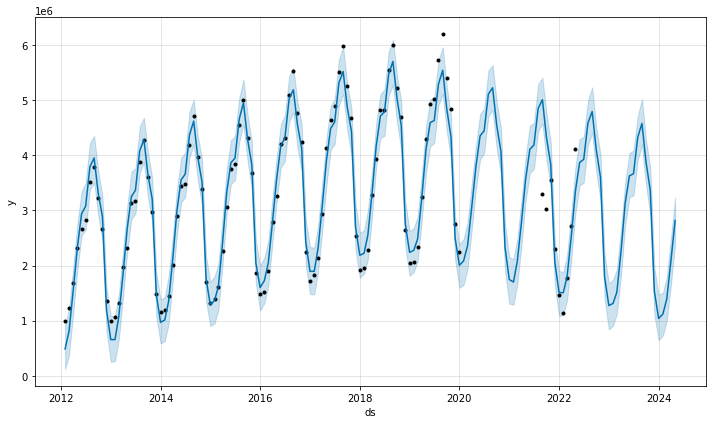

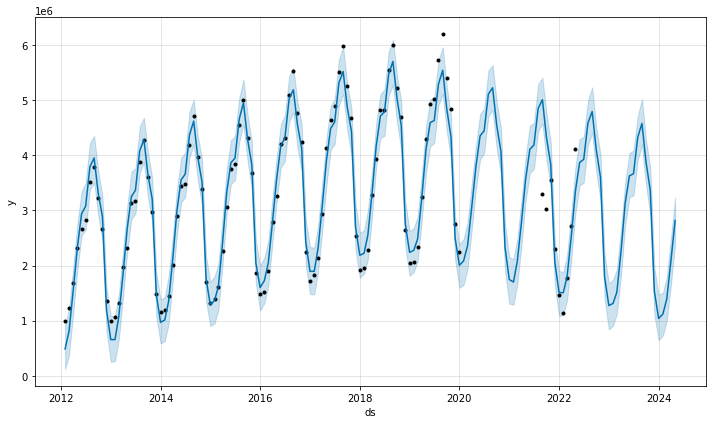

In [71]:
model.plot(forecast_data)

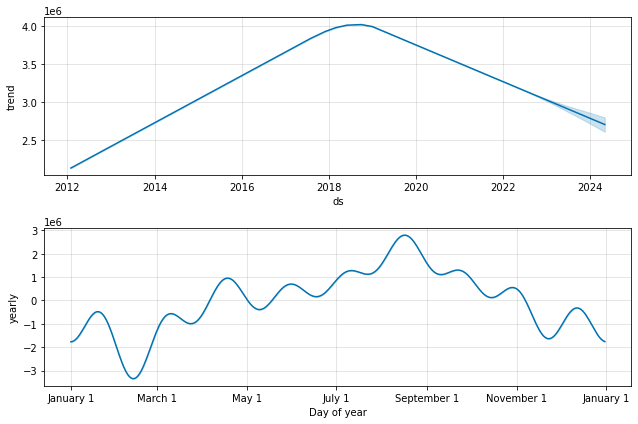

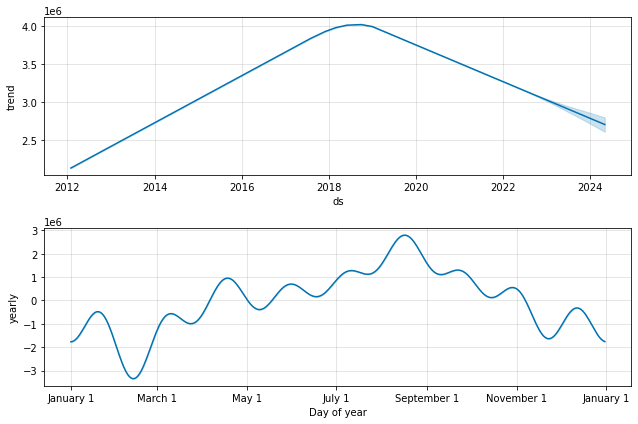

In [72]:
model.plot_components(forecast_data)